# **1.📘 Perkenalan Dataset**


## Dataset: Car Purchase Prediction 🚗

Dataset ini diperoleh dari platform [Kaggle](https://www.kaggle.com/code/casper6290/car-purchase-prediction), yang berisi informasi pelanggan seperti usia, jenis kelamin, dan pendapatan tahunan, serta target apakah pelanggan melakukan pembelian mobil atau tidak.

## 🎯 Tujuan

Membangun model machine learning yang mampu **memprediksi keputusan pembelian mobil** berdasarkan karakteristik pengguna.

## 📊 Deskripsi Fitur

| Kolom           | Deskripsi                                         |
|------------------|--------------------------------------------------|
| `User ID`        | ID unik pelanggan                                |
| `Gender`         | Jenis kelamin pelanggan (Male/Female)           |
| `Age`            | Usia pelanggan                                   |
| `AnnualSalary`   | Pendapatan tahunan pelanggan (dalam USD)         |
| `Purchased`      | Target pembelian mobil (0 = tidak, 1 = membeli)  |

## 🧠 Tipe Masalah

Klasifikasi biner: target hanya memiliki dua kemungkinan nilai yaitu:
- `0` = Tidak membeli
- `1` = Membeli

## 🔗 Sumber Dataset

Dataset dapat diakses melalui tautan berikut:  
[https://www.kaggle.com/code/casper6290/car-purchase-prediction](https://www.kaggle.com/code/casper6290/car-purchase-prediction)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/laporan/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Pada tahap ini, dilakukan pengecekan struktur dataset menggunakan fungsi `df.info()`.  
Tujuannya adalah untuk memahami jumlah entri, tipe data setiap kolom, dan apakah terdapat missing value.

Hasil pengecekan:

- Dataset memiliki **1000 entri** dan **5 kolom**.
- Tidak ditemukan missing value pada seluruh kolom (semua kolom memiliki 1000 non-null).
- Tipe data setiap kolom:
  - **User ID** ➔ int64
  - **Gender** ➔ object (kategori/teks)
  - **Age** ➔ int64
  - **AnnualSalary** ➔ int64
  - **Purchased** ➔ int64

Uraian Fitur Dataset:
- **User ID**: ID unik yang diberikan kepada setiap pengguna (sebagai identitas, tidak digunakan untuk analisis prediktif).
- **Gender**: Jenis kelamin pengguna, berisi kategori seperti 'Male' dan 'Female'.
- **Age**: Usia pengguna dalam satuan tahun.
- **AnnualSalary**: Pendapatan tahunan pengguna dalam satuan mata uang (misalnya dolar atau rupiah tergantung sumber data).
- **Purchased**: Indikator apakah pengguna melakukan pembelian atau tidak (biasanya 0 = tidak membeli, 1 = membeli).
"""

In [4]:
# 1. Informasi Umum Dataset
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


Karena tidak ada missing value dan nilai duplikat, maka tidak diperlukan penanganan nilai kosong pada tahap ini.

In [6]:
# 2. Cek Duplikat dan Missing Value
print("Jumlah data duplikat:", df.duplicated().sum())
print("Jumlah data kosong:\n", df.isnull().sum())

Jumlah data duplikat: 0
Jumlah data kosong:
 User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


terlihat data tidak seimbang, antara class 1 dan 0

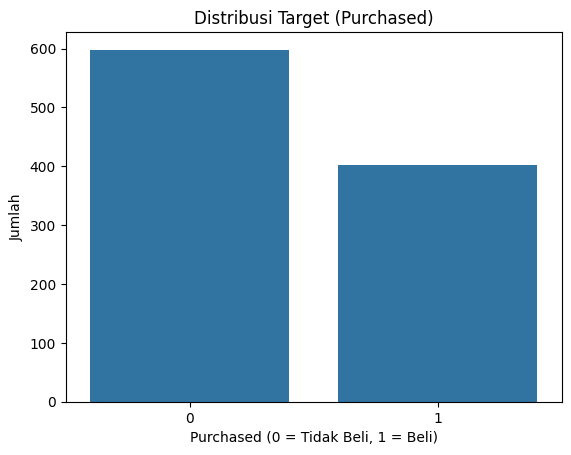

In [7]:
# 3. Distribusi Target
sns.countplot(x='Purchased', data=df)
plt.title('Distribusi Target (Purchased)')
plt.xlabel('Purchased (0 = Tidak Beli, 1 = Beli)')
plt.ylabel('Jumlah')
plt.show()


pada dataset terlihat bahwa dataset didominasi oleh 30 hingga 50 tahun, dan didominasi juga dari pendapatan 60k hingga 80k USD pertahun

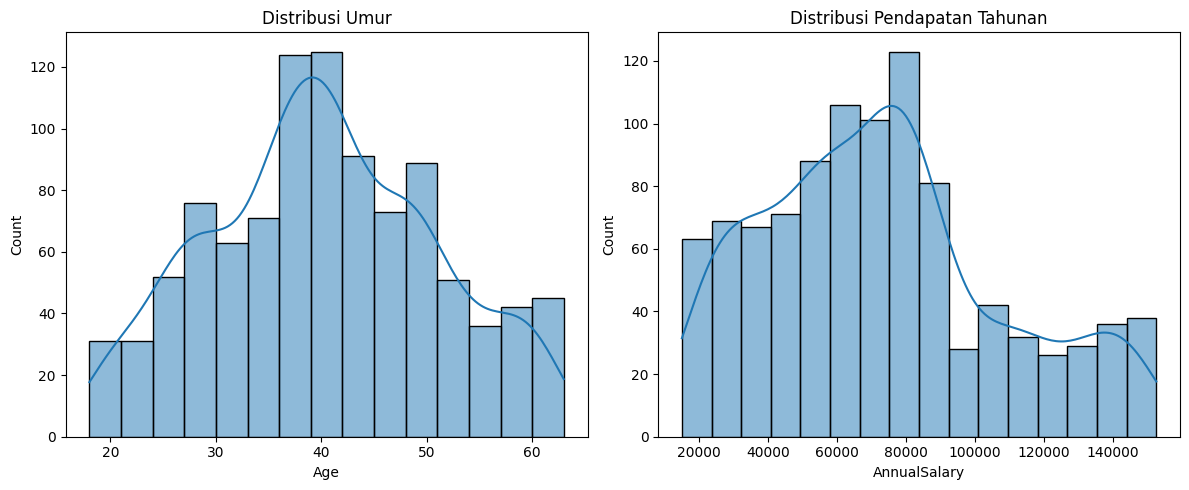

In [8]:
# 4. Distribusi Fitur Numerik
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Umur')
sns.histplot(df['AnnualSalary'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Pendapatan Tahunan')
plt.tight_layout()
plt.show()

dataset didominasi oleh perempuan, namun tetap tidak terlalu imbalance hanya berbeda selisih puluhan saja antara lelaki dan perempuan

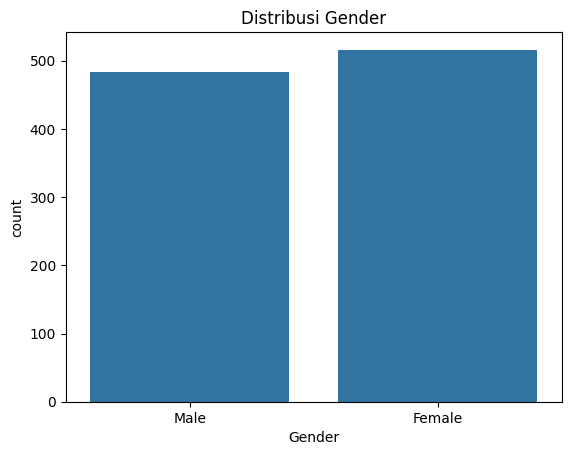

In [9]:
# 5. Distribusi Fitur Kategorikal
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.show()

terlihat bahwa UserId memiliki korelasi yang sangat kecil, dan ini bisa kita hapus nanti

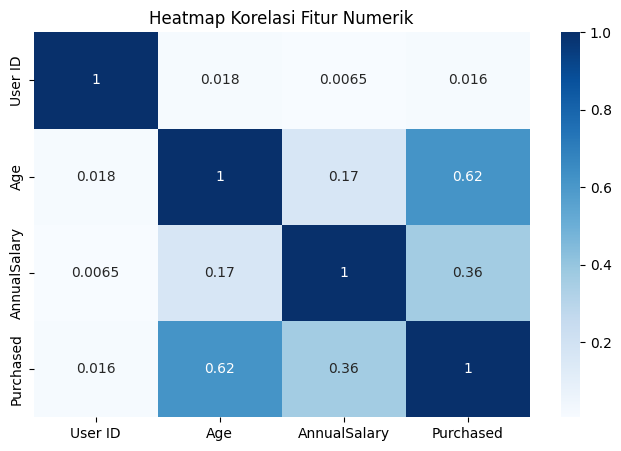

In [10]:
# 6. Korelasi Antar Fitur
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

orang dengan gaji diantara 20k hingga 140k USD Pertahun, dan usia 30 hingga 60 tahun cenderung beli mobil

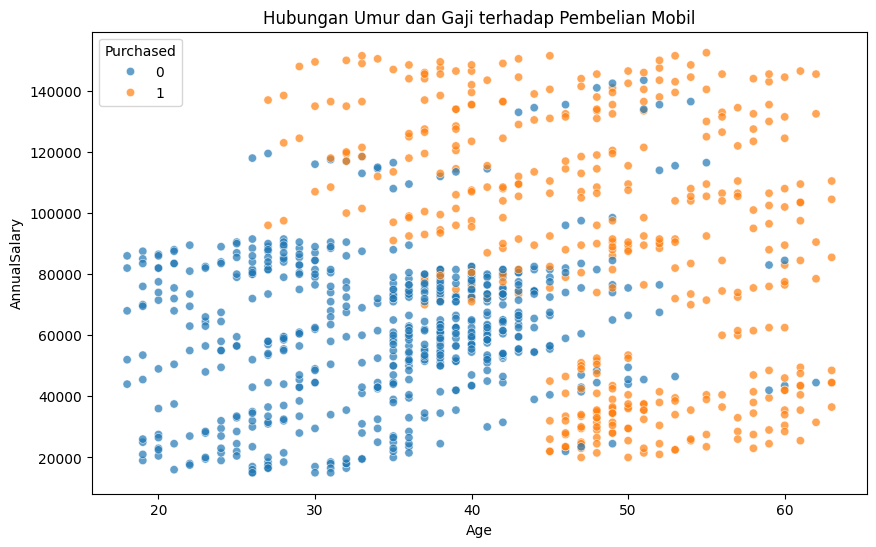

In [11]:
# 7. Analisis Multivariat: Apakah orang dengan gaji tinggi dan usia tertentu lebih cenderung beli mobil?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AnnualSalary', hue='Purchased', data=df, alpha=0.7)
plt.title('Hubungan Umur dan Gaji terhadap Pembelian Mobil')
plt.show()

Tidak terdapat outliers, artinya datanya bersih

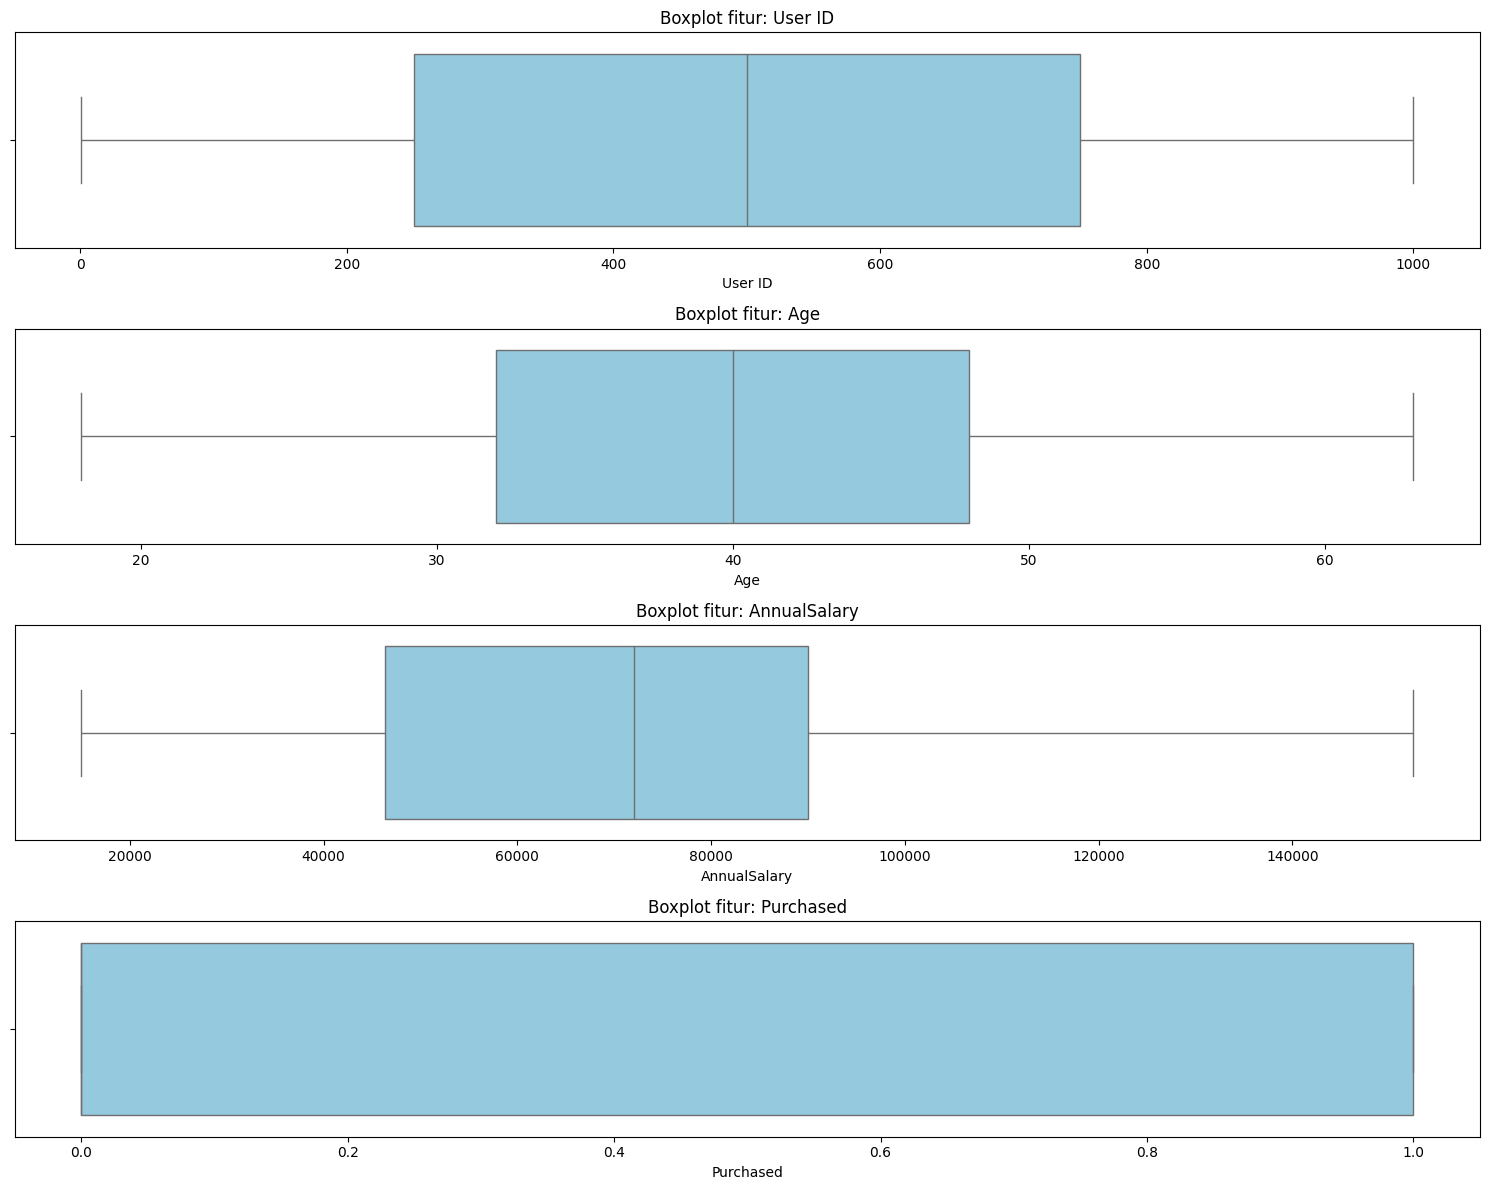

          Fitur        Q1        Q3      IQR  Batas Bawah  Batas Atas  \
0       User ID    250.75    750.25    499.5       -498.5      1499.5   
1           Age     32.00     48.00     16.0          8.0        72.0   
2  AnnualSalary  46375.00  90000.00  43625.0     -19062.5    155437.5   
3     Purchased      0.00      1.00      1.0         -1.5         2.5   

   Jumlah Outlier  
0               0  
1               0  
2               0  
3               0  


In [12]:
# 8. Cek Outliers dengan Ambil hanya kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplot untuk setiap fitur numerik
plt.figure(figsize=(15, len(numerical_cols) * 3))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot fitur: {col}', fontsize=12)
    plt.tight_layout()

plt.show()

outlier_info = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    total_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    outlier_info.append({
        'Fitur': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Batas Bawah': lower_bound,
        'Batas Atas': upper_bound,
        'Jumlah Outlier': total_outliers
    })

# Tampilkan sebagai DataFrame
outlier_df = pd.DataFrame(outlier_info)
print(outlier_df)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Setelah dilakukan **Label Encoding** pada kolom **'Gender'**, hasil encoding mengubah nilai teks ('Male' dan 'Female') menjadi nilai numerik sebagai berikut:
- **1** untuk 'Male'
- **0** untuk 'Female'

Setelah encoding, kolom **'Gender'** kini berisi angka 1 dan 0 yang mewakili **'Male'** dan **'Female'**.

In [13]:
#1. Label Encoding
label_encoder = LabelEncoder()

# Tentukan kolom yang akan di-encode
categorical_cols = ['Gender']

# Encode setiap kolom kategorikal
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Cek hasil encoding
print(df[categorical_cols].head())

df.head(5)

   Gender
0       1
1       1
2       1
3       1
4       1


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


kita menghapus kolom `User ID` karena memiliki korelasi yang kecil

In [14]:
#2. Penghapusan Kolom yang tidak dibutuhkan
cols_to_drop = ['User ID']

# Hapus kolom yang tidak dibutuhkan
df = df.drop(columns=cols_to_drop)

In [15]:
#3. Normalisasi Fitur
scaler = MinMaxScaler()
numerical_cols = ['Age', 'AnnualSalary']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Gender,Age,AnnualSalary,Purchased
0,1,0.377778,0.036364,0
1,1,0.488889,0.207273,0
2,1,0.688889,0.429091,0
3,1,0.488889,0.672727,1
4,1,0.155556,0.465455,0


Pada tahap ini, dataset dipisahkan menjadi dua bagian:
1. **Fitur (X)**: Kolom-kolom yang akan digunakan untuk memprediksi target. Kolom **'Purchased'** dihapus dari dataset dan sisanya menjadi fitur.
2. **Target (y)**: Kolom **'Purchased'** yang menjadi target prediksi, yaitu apakah pengguna akan melakukan pembelian atau tidak (nilai 1 atau 0).
"""

In [16]:
#4. Pemisahan Fitur dan Target

X = df.drop('Purchased', axis=1)
y = df['Purchased']

Pada tahap ini, dilakukan **oversampling** pada dataset menggunakan teknik **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE digunakan untuk menangani masalah ketidakseimbangan kelas dengan cara menghasilkan sampel sintetis untuk kelas yang lebih sedikit. Dalam hal ini, kita melakukan oversampling pada kelas **'Purchased'** yang memiliki distribusi tidak seimbang antara kelas 0 dan 1.

Hasil Oversampling dengan SMOTE : Distribusi kelas **'Purchased'** setelah dilakukan **oversampling** menunjukkan bahwa kedua kelas (0 dan 1) kini memiliki jumlah yang **seimbang**, yaitu sebanyak **598** sampel untuk setiap kelas.

Dengan melakukan **SMOTE**, kita memastikan bahwa model tidak akan terpengaruh oleh ketidakseimbangan kelas yang dapat mempengaruhi akurasi prediksi.

Visualisasi Distribusi Kelas : Distribusi kelas **'Purchased'** setelah oversampling divisualisasikan dengan menggunakan **countplot**. Grafik ini menunjukkan jumlah sampel pada kedua kelas yang sudah seimbang.


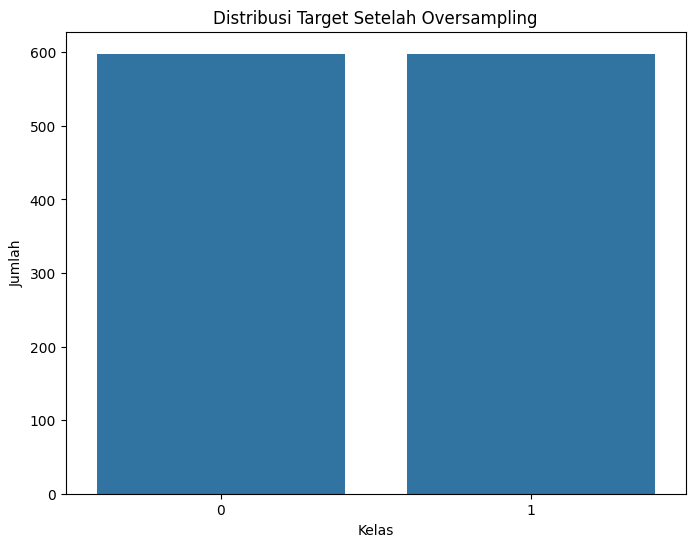

In [17]:
#5. Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribusi Target Setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

Pada tahap ini, dataset yang sudah dioversample dengan SMOTE dibagi menjadi **train set** dan **test set**. Pembagian ini dilakukan untuk melatih model pada data **train set** dan menguji performa model pada data **test set** yang tidak terlihat sebelumnya.

Pembagian Data Menjadi Train dan Test Set :

- **X_train**: Fitur untuk **train set**.
- **X_test**: Fitur untuk **test set**.
- **y_train**: Target untuk **train set**.
- **y_test**: Target untuk **test set**.

Dengan parameter **test_size=0.2**, 20% data digunakan untuk **test set**, dan sisanya (80%) digunakan untuk **train set**. Pembagian ini membantu memastikan bahwa model dilatih pada data yang cukup besar dan diuji pada data yang belum pernah dilihat sebelumnya.

Proses ini mempersiapkan data untuk pelatihan model dan evaluasi kinerjanya.

In [18]:
#6. Pembagian Data Menjadi Train dan Test Set

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
